# liberaries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures



# Import Data 

In [2]:
data=fetch_california_housing()
data
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df['MedHouseVal']=data['target']


# EDA

In [3]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [4]:
df.shape

(20640, 9)

In [5]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [8]:
df.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [9]:
df.isnull().mean()*100


MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
Latitude       0.0
Longitude      0.0
MedHouseVal    0.0
dtype: float64

# Clean

## change Population to int

In [10]:
df['Population']=df['Population'].astype('int')

## change HouseAge to int

In [11]:
df['HouseAge']=df['HouseAge'].astype('int')

In [12]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1  8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2  7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3  5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4  3.8462        52  6.281853   1.081081         565  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

## Check Column Redundancy

<Axes: >

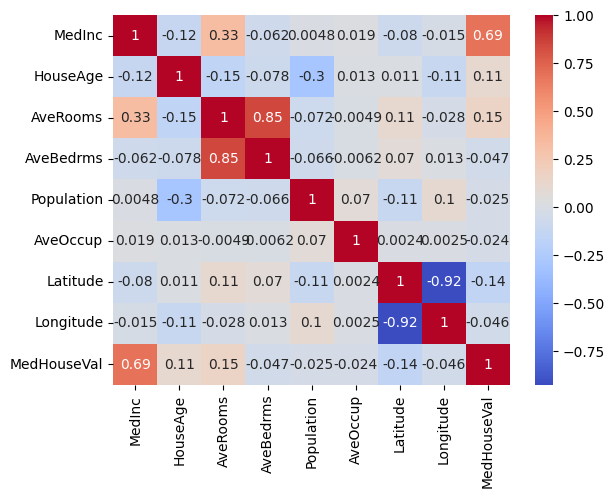

In [13]:
sb.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Check duplicates

In [14]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []

In [15]:

df.drop_duplicates(keep='first',inplace=True)
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1      8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2      7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3      5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4      3.8462        52  6.281853   1.081081         565  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603        25  5.045455   1.133333         845  2.560606     39.48   
20636  2.5568        18  6.114035   1.315789         356  3.122807     39.49   
20637  1.7000        17  5.205543   1.120092        1007  2.325635     39.43   
20638  1.8672        18  5.329513   1.171920         741  2.123209     39.43   
20639  2.3886        16  5.254717   1.162264        1387  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

# Univariate

## Relationships between all data

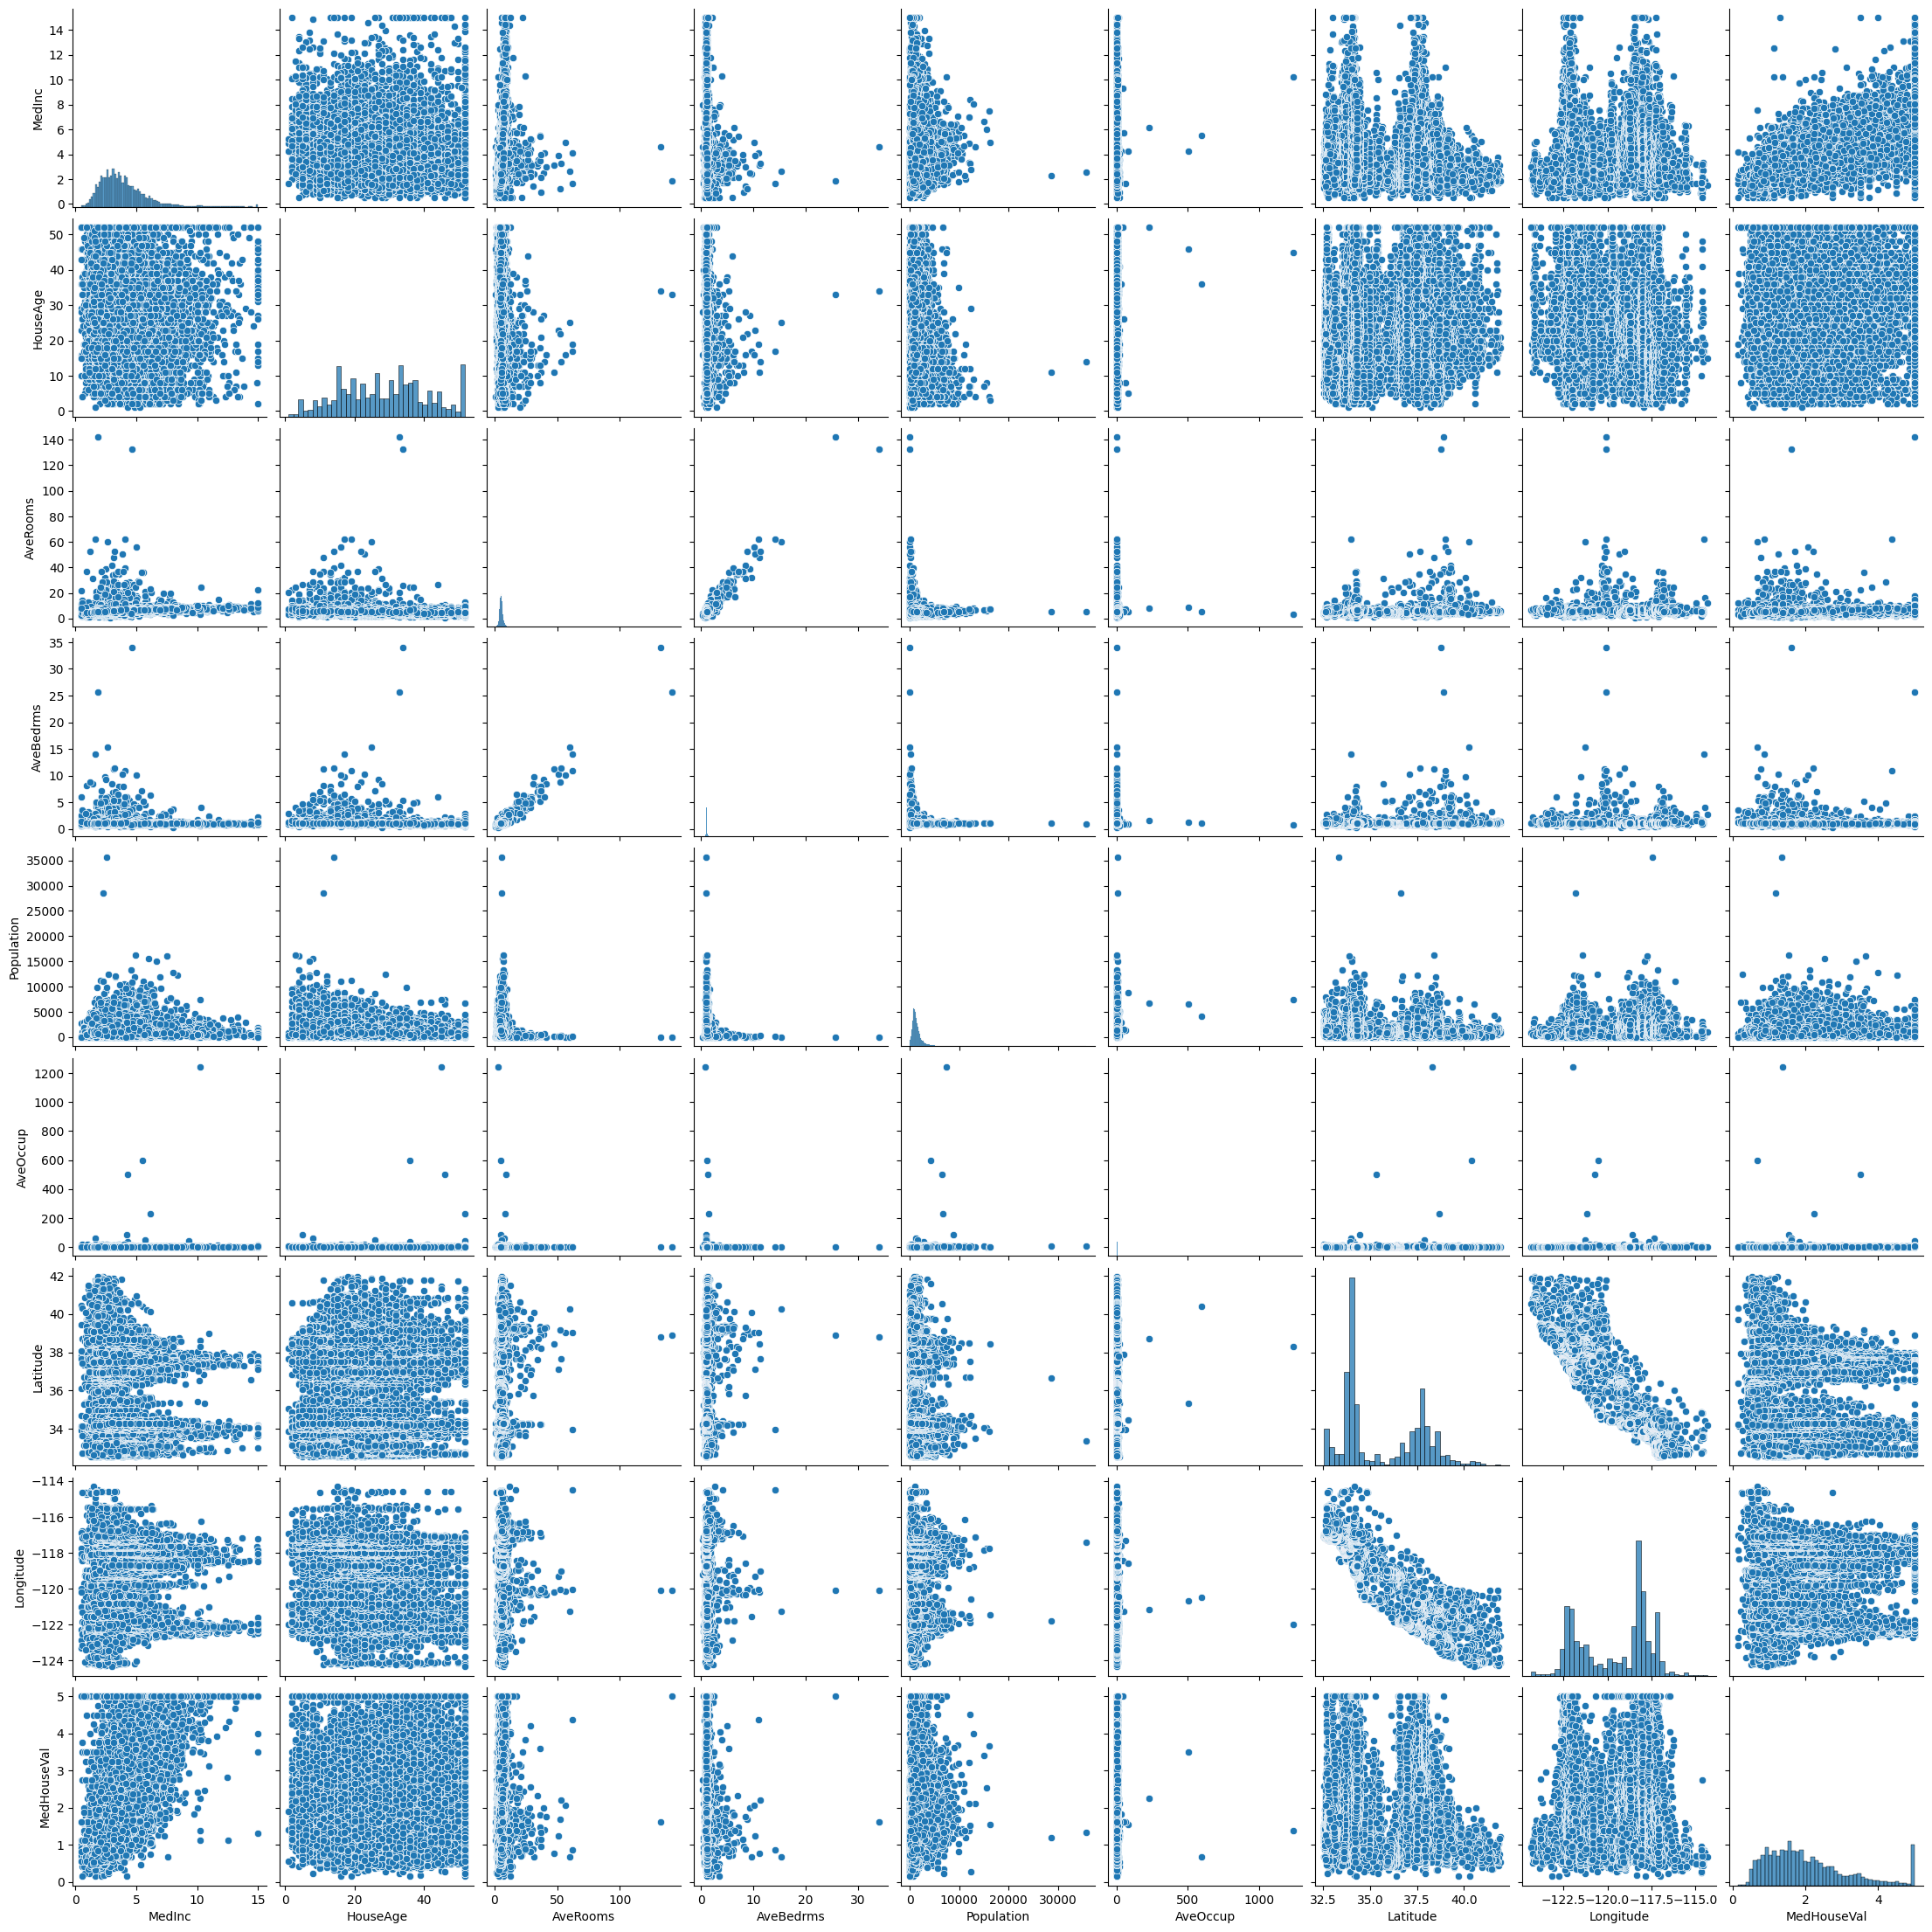

In [16]:
sb.pairplot(df)
plt.show()

## MedInc

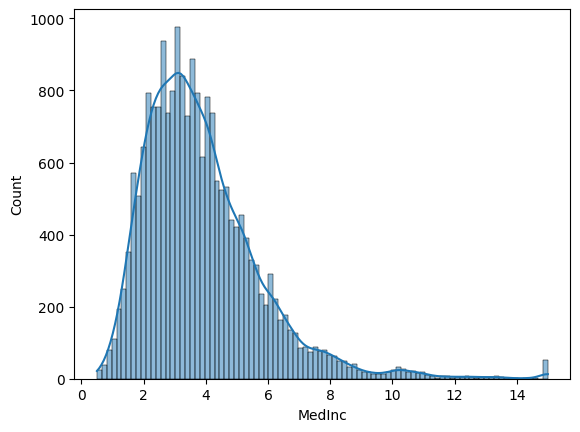

In [17]:
sb.histplot(x='MedInc',data=df,kde=True)
plt.show()

In [18]:
mn=df['MedInc'].mean()
sd=df['MedInc'].std()
z_score=(df['MedInc']-mn)/sd
outliers=z_score[(z_score > 3.0) | (z_score <-3.0) ]
perc=(len(outliers)/len(df['MedInc']))*100
print(perc)
outliers=(outliers * sd)+mn


1.6715116279069766


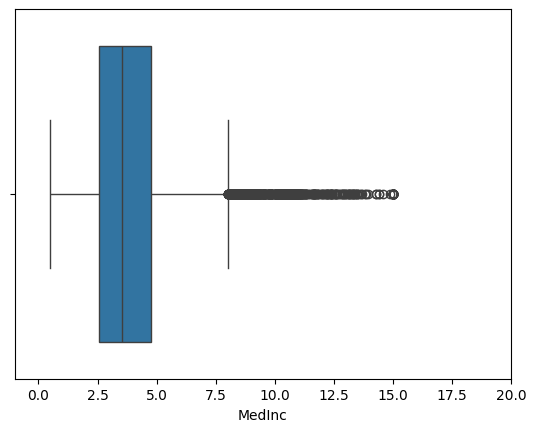

In [19]:
sb.boxplot(x='MedInc',data=df)
plt.xlim(-1,20)
plt.show()

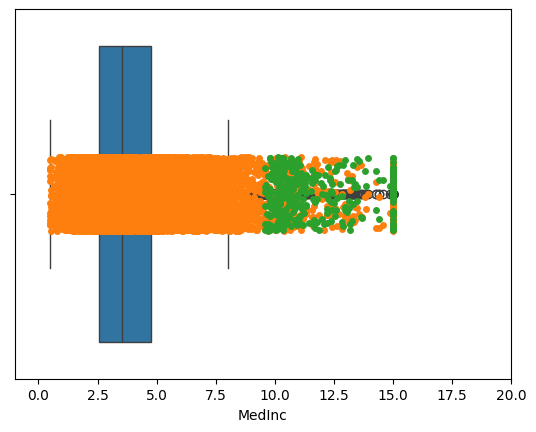

In [20]:
sb.boxplot(x='MedInc',data=df)
sb.stripplot(x='MedInc',data=df)
sb.stripplot(x=outliers)
plt.xlim(-1,20)
plt.show()

<Axes: ylabel='MedInc'>

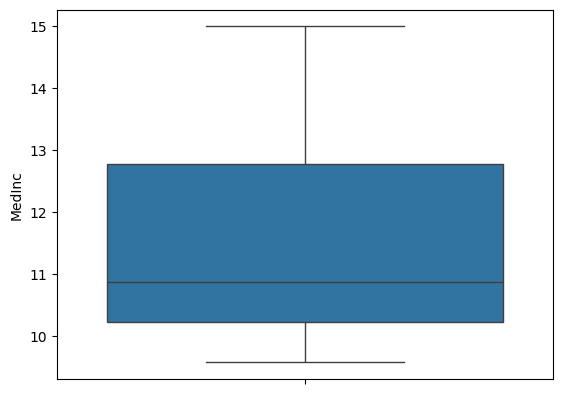

In [21]:
sb.boxplot(outliers)

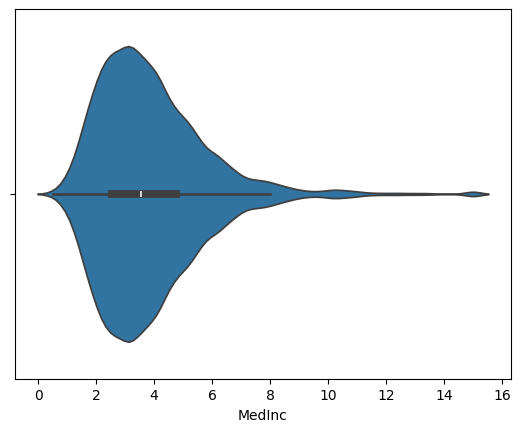

In [22]:
sb.violinplot(x='MedInc',data=df)
plt.show()

## HouseAge

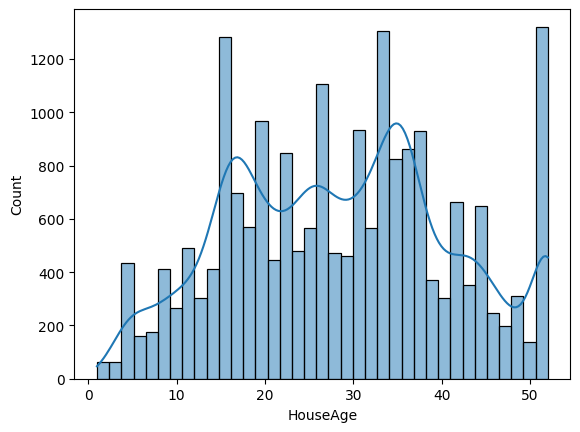

In [23]:
sb.histplot(x='HouseAge',data=df,kde=True)
plt.show()

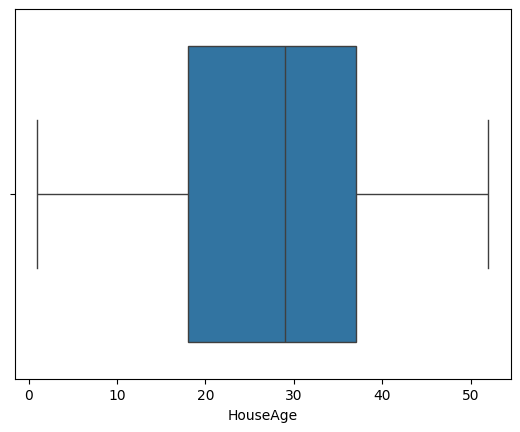

In [24]:
sb.boxplot(x='HouseAge',data=df)
plt.show()

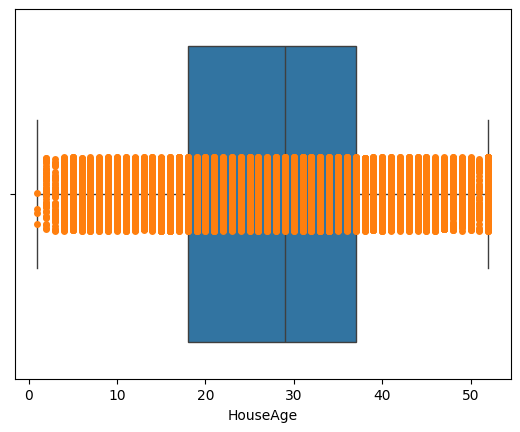

In [25]:
sb.boxplot(x='HouseAge',data=df)
sb.stripplot(x='HouseAge',data=df)
plt.show()

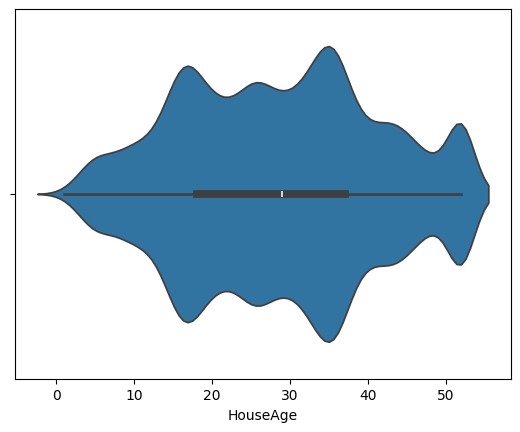

In [26]:
sb.violinplot(x='HouseAge',data=df)
plt.show()

## AveRooms

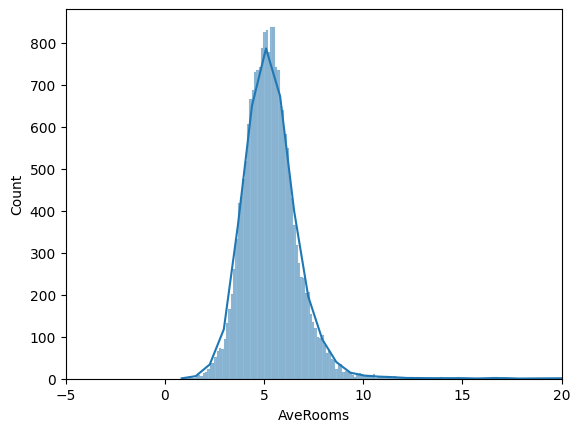

In [27]:
sb.histplot(x='AveRooms',data=df,kde=True)
plt.xlim(-5,20)
plt.show()

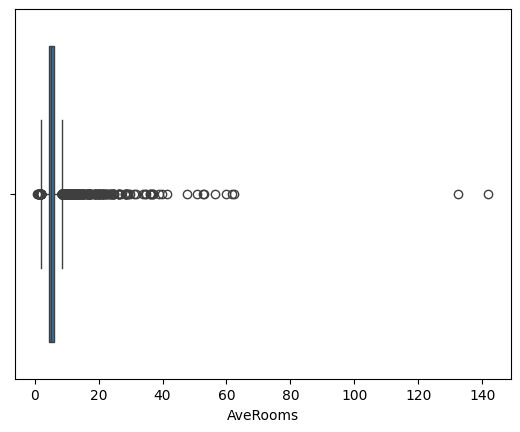

In [28]:
sb.boxplot(x='AveRooms',data=df)
plt.show()

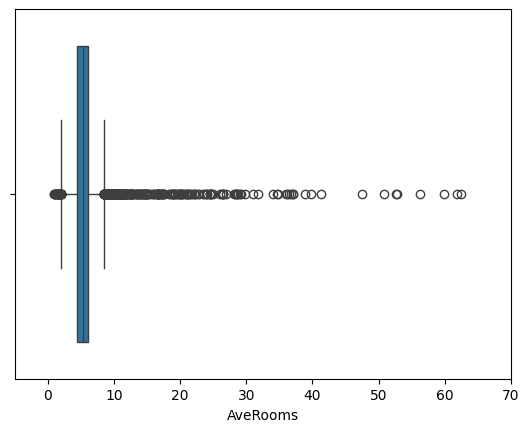

In [29]:
sb.boxplot(x='AveRooms',data=df)
plt.xlim(-5,70)
plt.show()

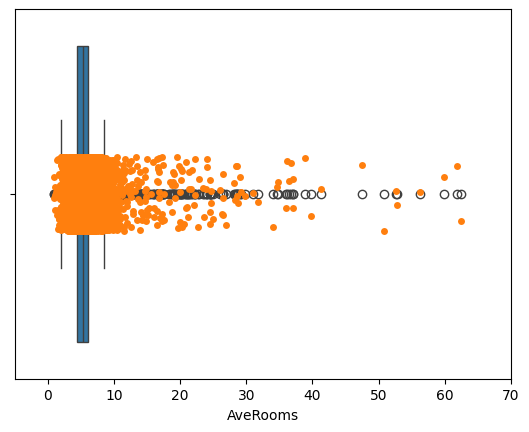

In [30]:
sb.boxplot(x='AveRooms',data=df)
sb.stripplot(x='AveRooms',data=df)
plt.xlim(-5,70)
plt.show()

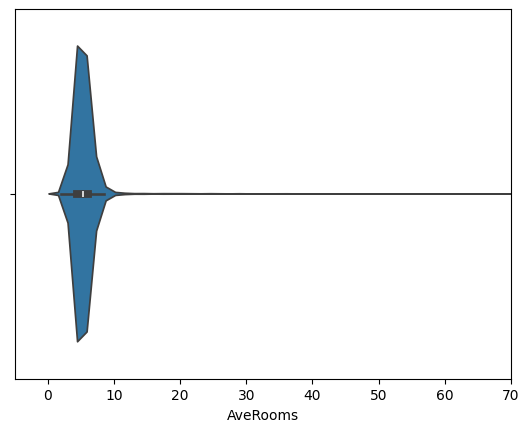

In [31]:
sb.violinplot(x='AveRooms',data=df)
plt.xlim(-5,70)
plt.show()

## AveBedrms

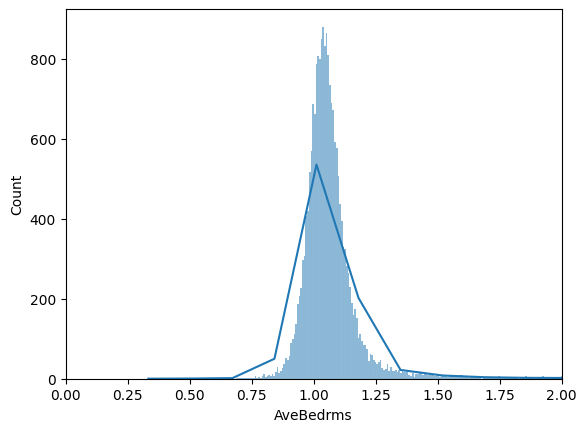

In [32]:
sb.histplot(x='AveBedrms',data=df,kde=True)
plt.xlim(0,2)
plt.show()

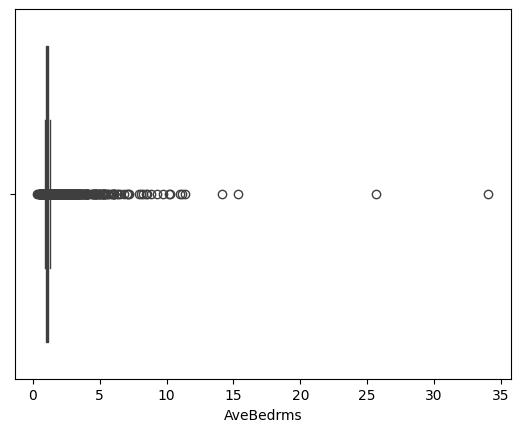

In [33]:
sb.boxplot(x='AveBedrms',data=df)
plt.show()

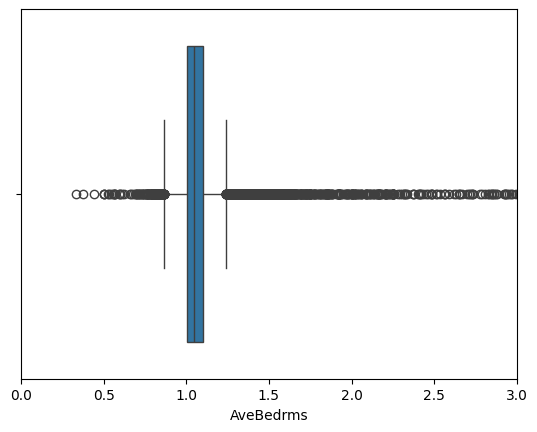

In [34]:
sb.boxplot(x='AveBedrms',data=df)
plt.xlim(0,3)
plt.show()

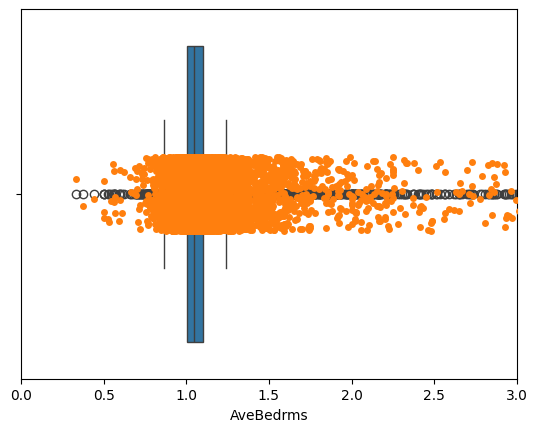

In [35]:
sb.boxplot(x='AveBedrms',data=df)
sb.stripplot(x='AveBedrms',data=df)
plt.xlim(0,3)
plt.show()

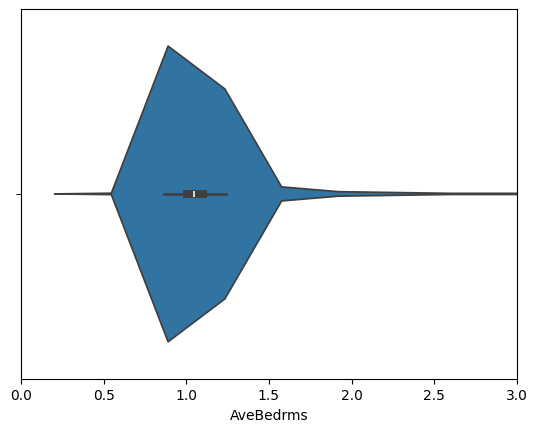

In [36]:
sb.violinplot(x='AveBedrms',data=df)
plt.xlim(0,3)
plt.show()

In [37]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

## Population

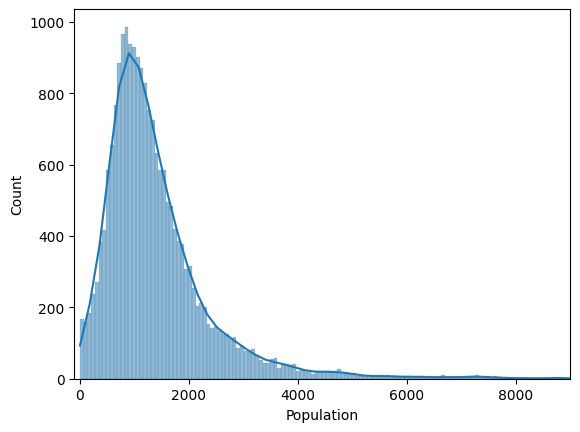

In [38]:
sb.histplot(x='Population',data=df,kde=True)
plt.xlim(-100,9000)
plt.show()

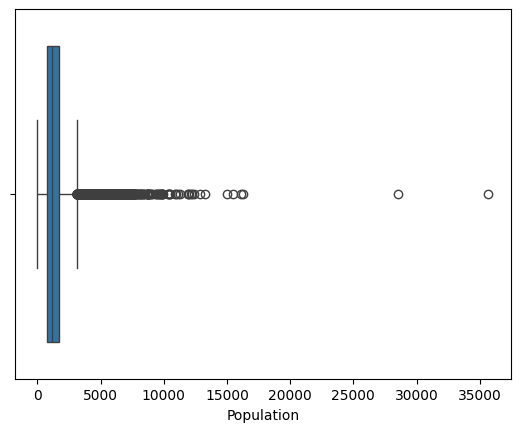

In [39]:
sb.boxplot(x='Population',data=df)
plt.show()

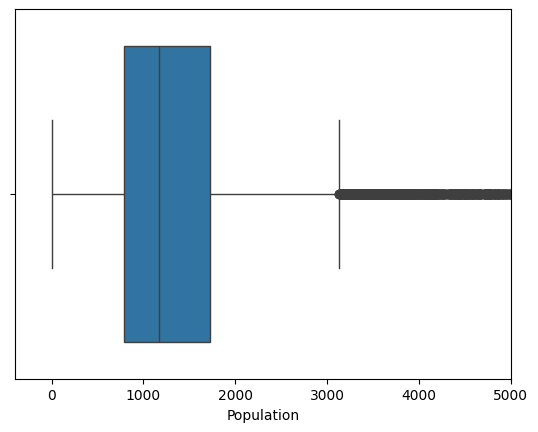

In [40]:
sb.boxplot(x='Population',data=df)
plt.xlim(-400,5000)
plt.show()

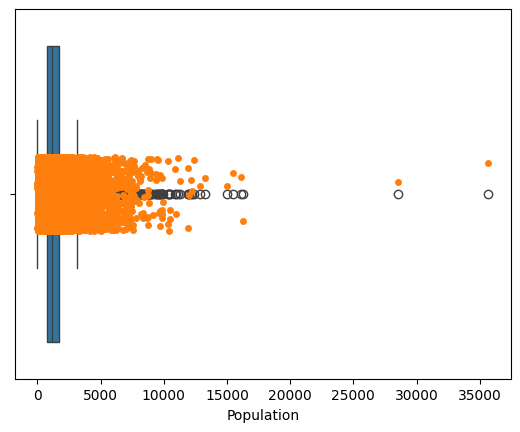

In [41]:
sb.boxplot(x='Population',data=df)
sb.stripplot(x='Population',data=df)
plt.show()

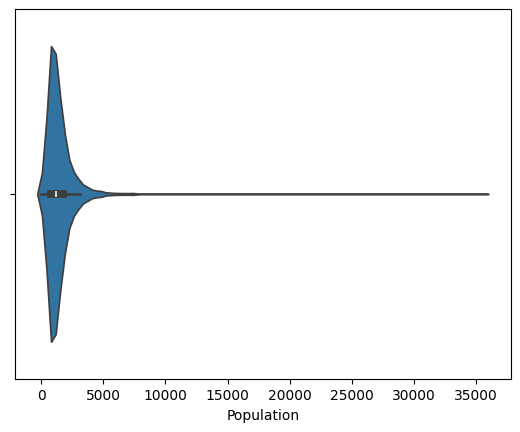

In [42]:
sb.violinplot(x='Population',data=df)
plt.show()

In [43]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

## AveOccup

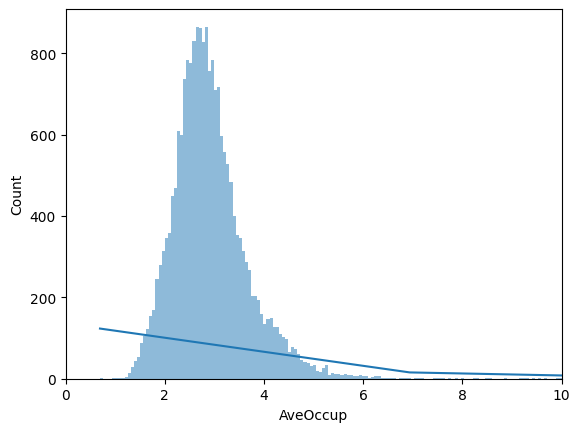

In [44]:
sb.histplot(x='AveOccup',data=df,kde=True)
plt.xlim(0,10)
plt.show()

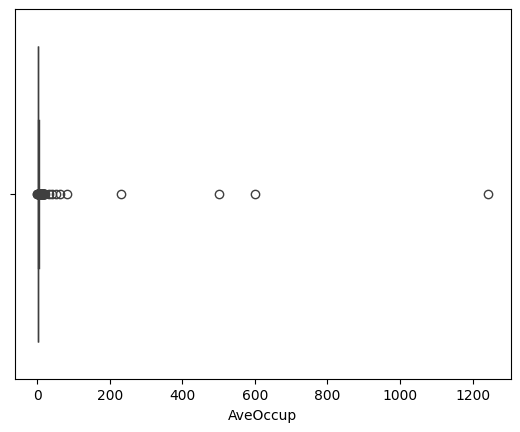

In [45]:
sb.boxplot(x='AveOccup',data=df)
plt.show()

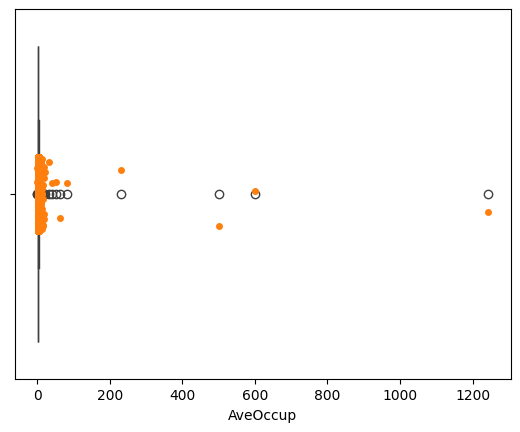

In [46]:
sb.boxplot(x='AveOccup',data=df)
sb.stripplot(x='AveOccup',data=df)
plt.show()

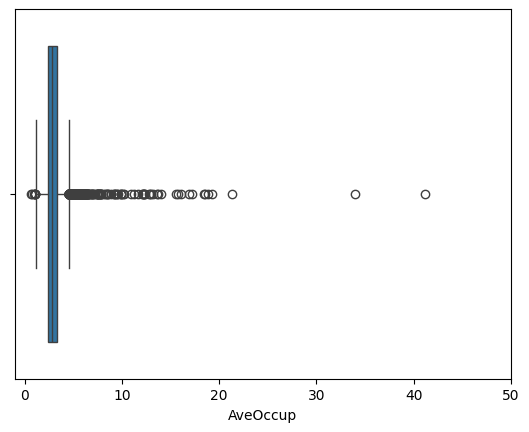

In [47]:
sb.boxplot(x='AveOccup',data=df)
plt.xlim(-1,50)
plt.show()

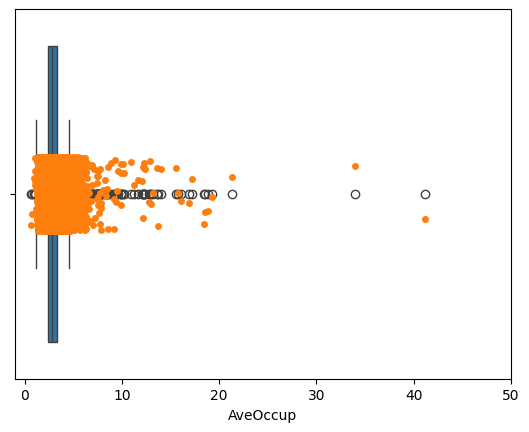

In [48]:
sb.boxplot(x='AveOccup',data=df)
sb.stripplot(x='AveOccup',data=df)
plt.xlim(-1,50)
plt.show()

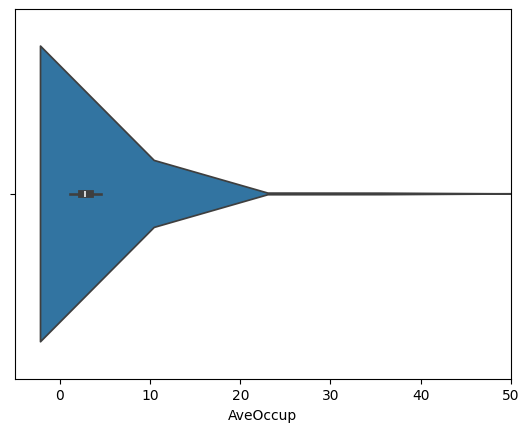

In [49]:
sb.violinplot(x='AveOccup',data=df)
plt.xlim(-5,50)
plt.show()

In [50]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

## Latitude

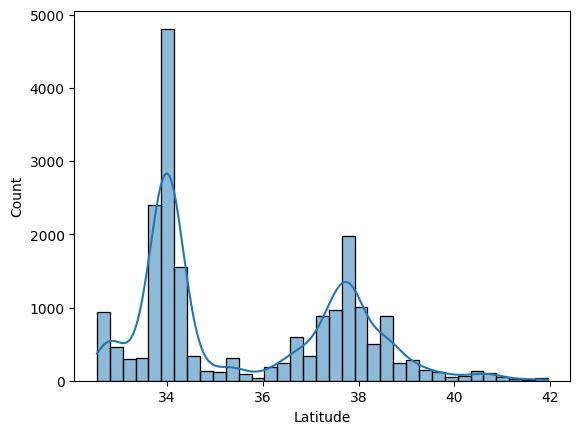

In [51]:
sb.histplot(x='Latitude',data=df,kde=True)
plt.show()

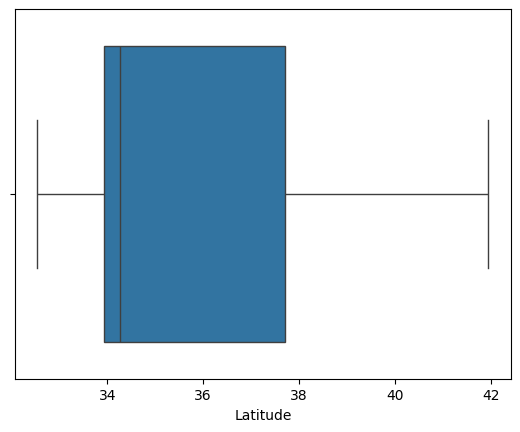

In [52]:
sb.boxplot(x='Latitude',data=df)
plt.show()

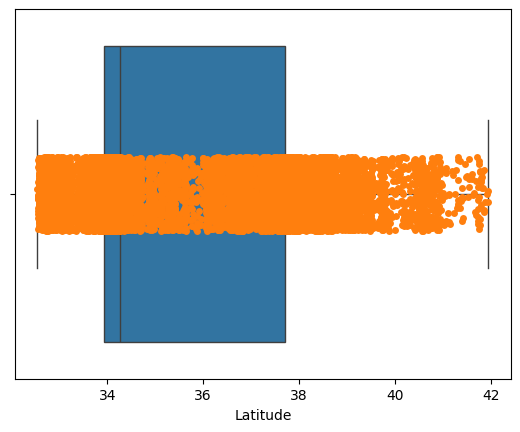

In [53]:
sb.boxplot(x='Latitude',data=df)
sb.stripplot(x='Latitude',data=df)
plt.show()



## Longitude

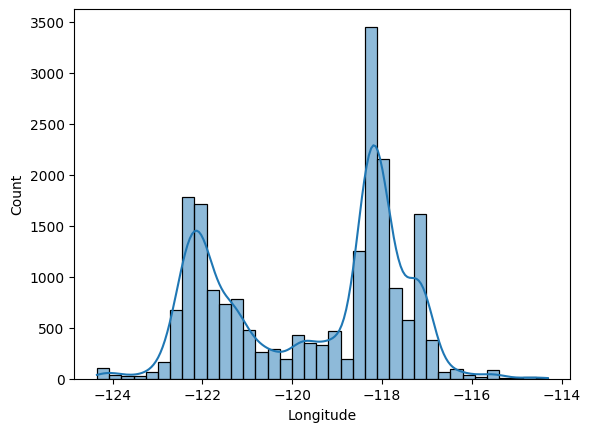

In [54]:
sb.histplot(x='Longitude',data=df,kde=True)
plt.show()

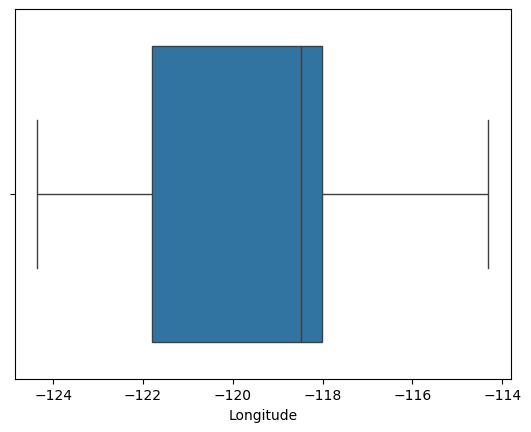

In [55]:
sb.boxplot(x='Longitude',data=df)
plt.show()

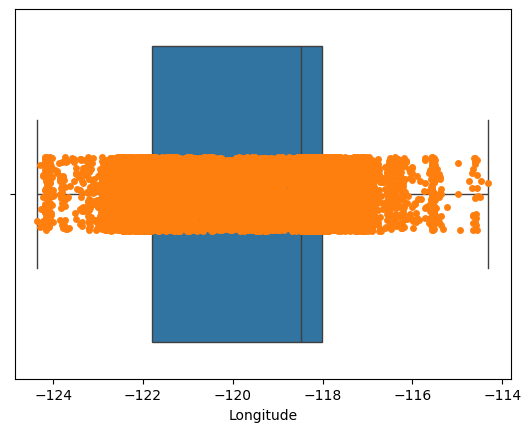

In [56]:
sb.boxplot(x='Longitude',data=df)
sb.stripplot(x='Longitude',data=df)
plt.show()

## MedHouseVal

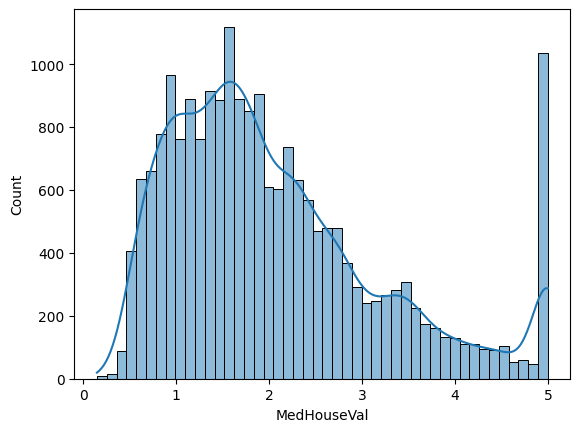

In [57]:
sb.histplot(x='MedHouseVal',data=df,kde=True)
plt.show()

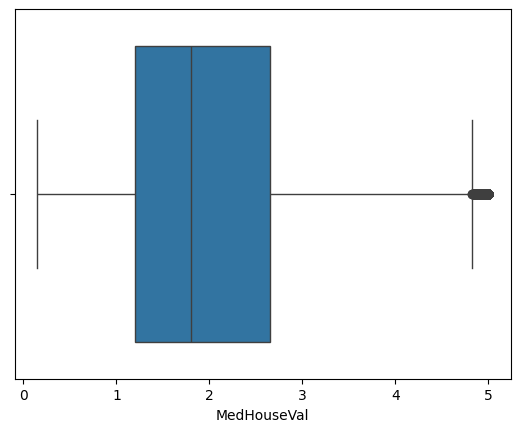

In [58]:
sb.boxplot(x='MedHouseVal',data=df)
plt.show()

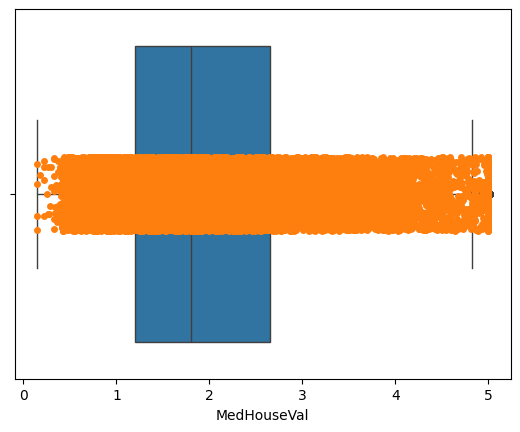

In [59]:
sb.boxplot(x='MedHouseVal',data=df)
sb.stripplot(x='MedHouseVal',data=df)
plt.show()

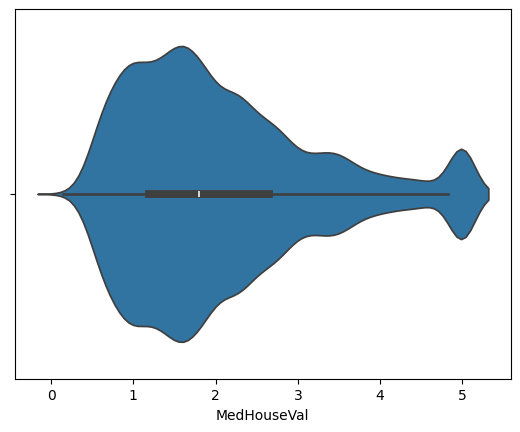

In [60]:
sb.violinplot(x='MedHouseVal',data=df)
plt.show()

# Bivariate analysis

## MedInc & HouseAge

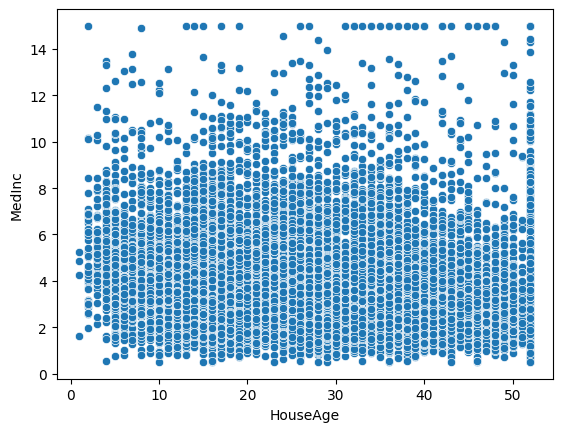

In [61]:
sb.scatterplot(x='HouseAge',y='MedInc',data=df)
plt.show()

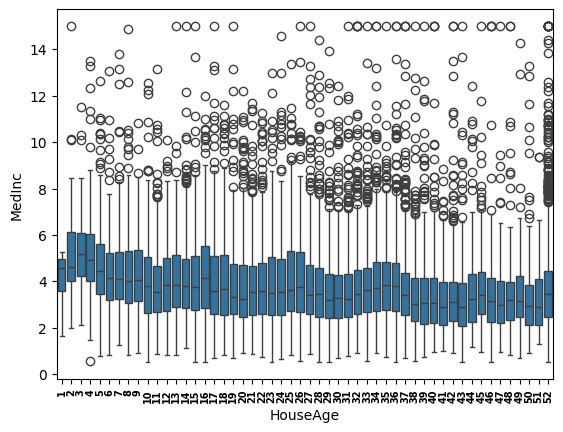

In [62]:
sb.boxplot(x='HouseAge',y='MedInc',data=df)
plt.xticks(rotation=90,fontsize=7,fontweight='bold')
plt.show()

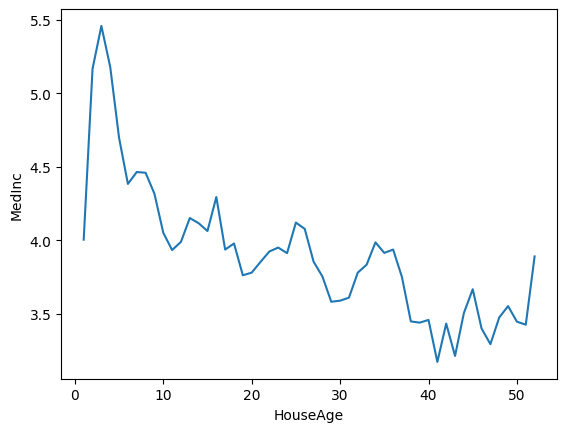

In [63]:
sb.lineplot(x='HouseAge',y='MedInc',data=df,errorbar=None)
plt.show()

## MedInc & AveRooms


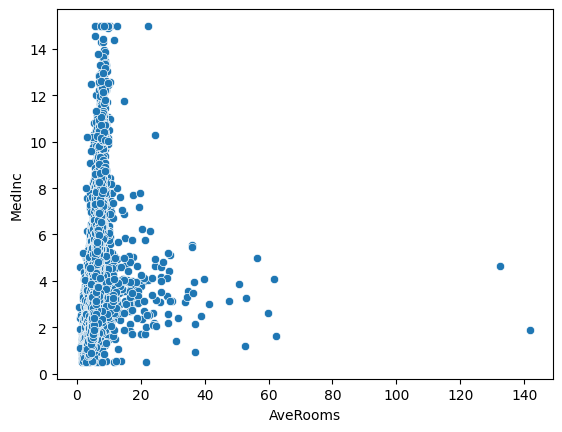

In [64]:
sb.scatterplot(x='AveRooms',y='MedInc',data=df)
plt.show()

## MedInc & AveBedrms

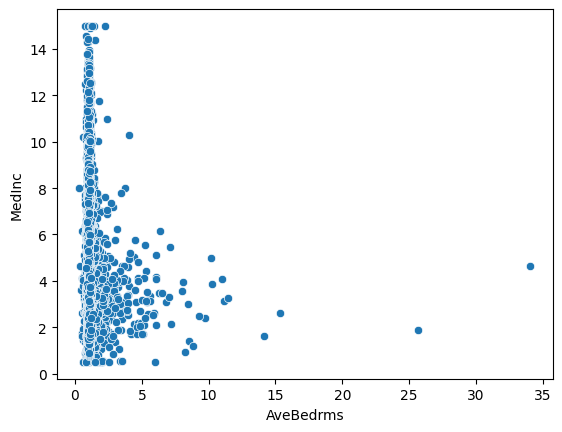

In [65]:
sb.scatterplot(x='AveBedrms',y='MedInc',data=df)
plt.show()

## MedInc & Population

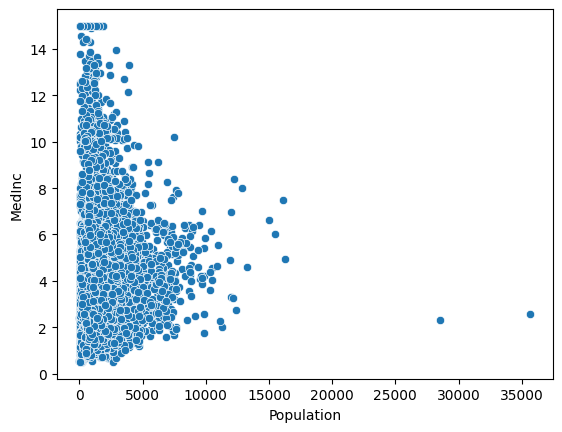

In [66]:
sb.scatterplot(x='Population',y='MedInc',data=df)
plt.show()

## MedInc & AveOccup

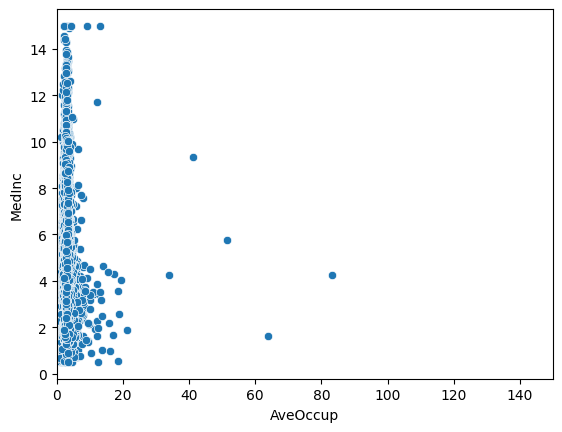

In [67]:
sb.scatterplot(x='AveOccup',y='MedInc',data=df)
plt.xlim(0,150)
plt.show()

## MedInc & MedHouseVal

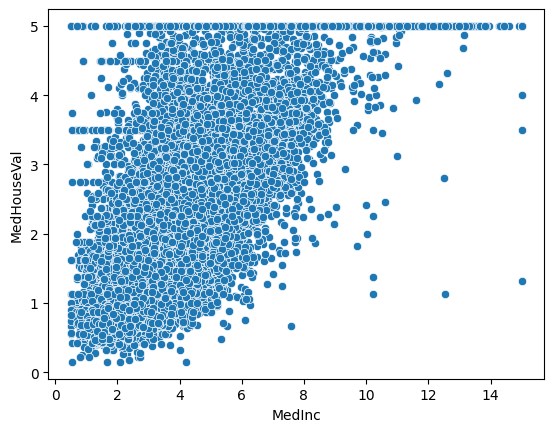

In [68]:
sb.scatterplot(y='MedHouseVal',x='MedInc',data=df)
plt.show()

## HouseAge & AveRooms

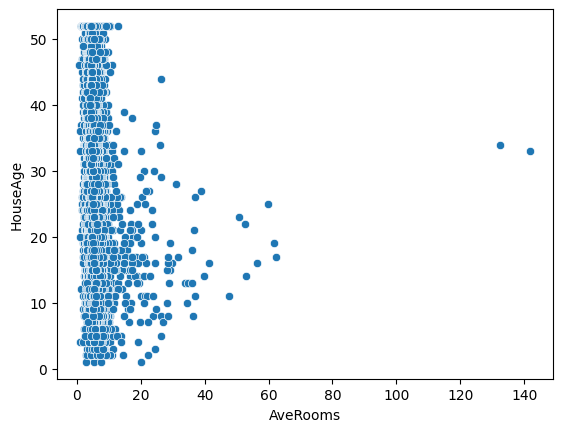

In [69]:
sb.scatterplot(y='HouseAge',x='AveRooms',data=df)
plt.show()

## HouseAge & AveBedrms

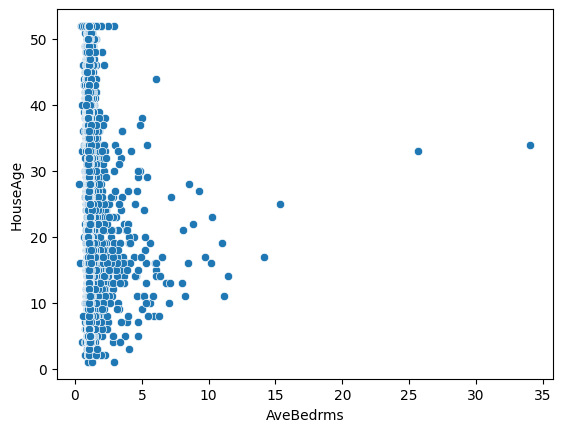

In [70]:
sb.scatterplot(y='HouseAge',x='AveBedrms',data=df)
plt.show()

## HouseAge & Population

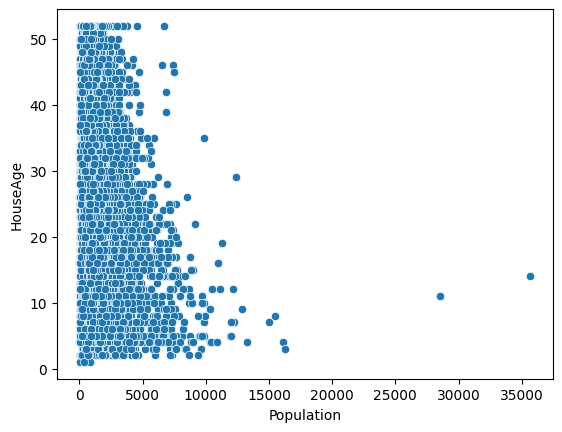

In [71]:
sb.scatterplot(y='HouseAge',x='Population',data=df)
plt.show()

## HouseAge & AveOccup

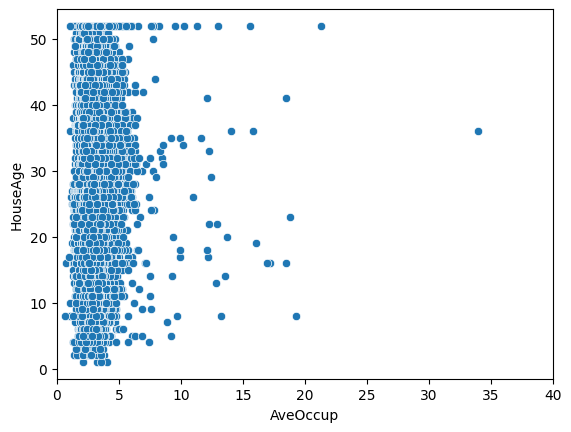

In [72]:
sb.scatterplot(y='HouseAge',x='AveOccup',data=df)
plt.xlim(0,40)
plt.show()

## HouseAge & MedHouseVal

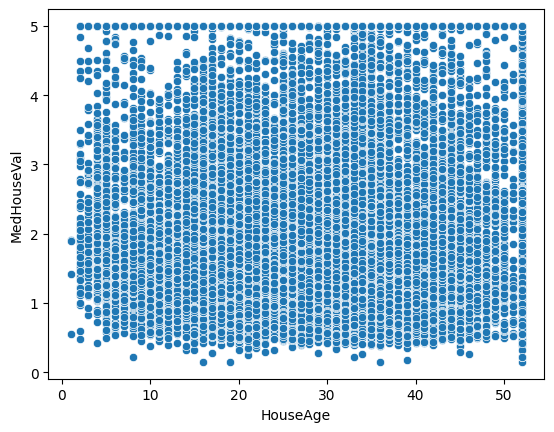

In [73]:
sb.scatterplot(x='HouseAge',y='MedHouseVal',data=df)
plt.show()

## MedHouseVal & AveRooms

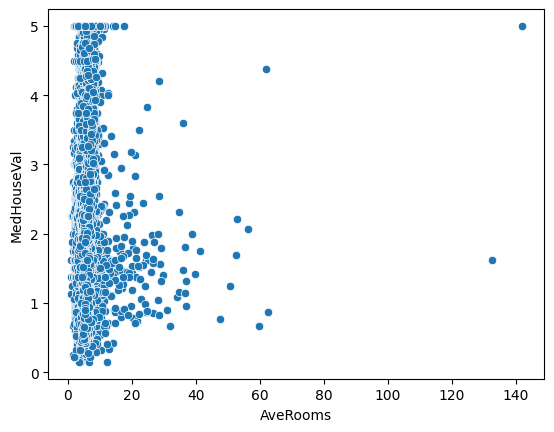

In [74]:
sb.scatterplot(x='AveRooms',y='MedHouseVal',data=df)
plt.show()

## MedHouseVal & AveBedrms

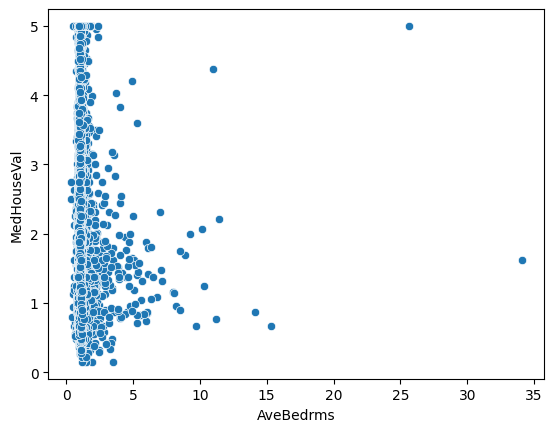

In [75]:
sb.scatterplot(x='AveBedrms',y='MedHouseVal',data=df)
plt.show()

## MedHouseVal & Population

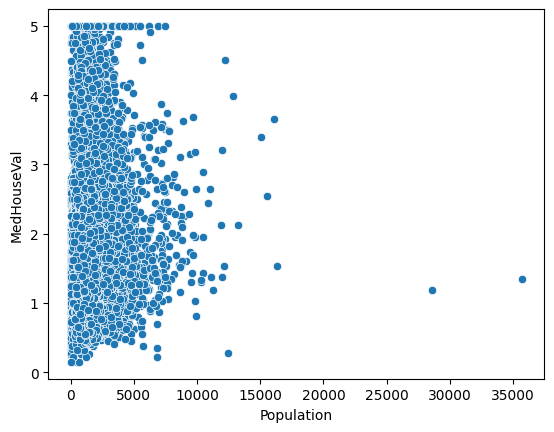

In [76]:
sb.scatterplot(x='Population',y='MedHouseVal',data=df)
plt.show()

## MedHouseVal & AveOccup

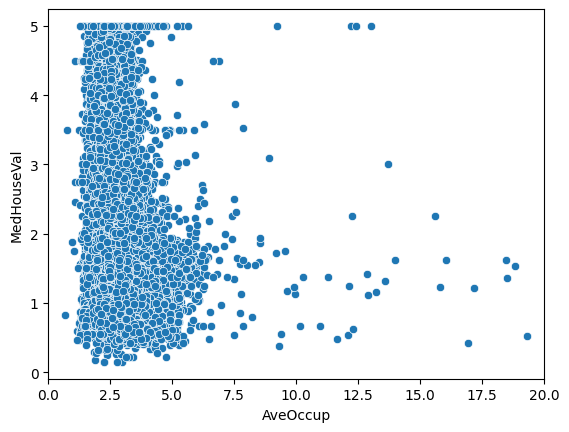

In [77]:
sb.scatterplot(x='AveOccup',y='MedHouseVal',data=df)
plt.xlim(0,20)
plt.show()

## MedHouseVal & Latitude

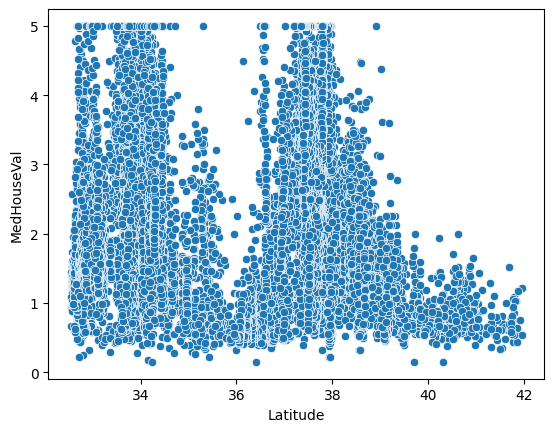

In [78]:
sb.scatterplot(x='Latitude',y='MedHouseVal',data=df)
plt.show()

## MedHouseVal & Longitude

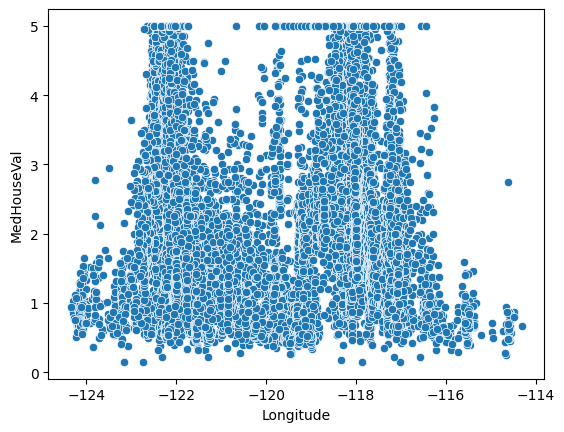

In [79]:
sb.scatterplot(x='Longitude',y='MedHouseVal',data=df)
plt.show()

# Multivariate analysis

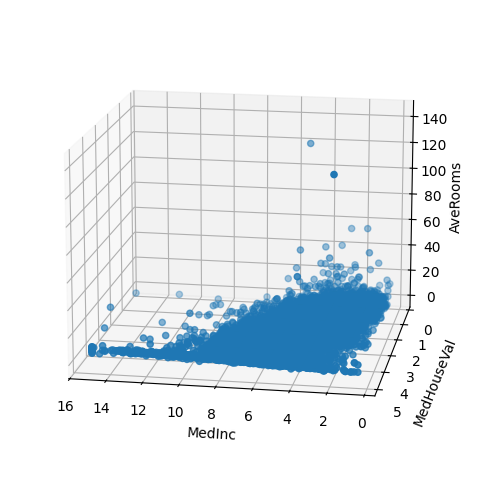

In [80]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MedInc'],df['MedHouseVal'],df['AveRooms'],s=20)
ax.set_xlabel('MedInc')
ax.set_ylabel('MedHouseVal')
ax.set_zlabel('AveRooms')
ax.view_init(elev=15, azim=100)
plt.show()

# Model

## split

In [81]:
x=df.drop(columns='MedHouseVal')
y=df['MedHouseVal']
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

## scale

In [82]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [83]:
robust=RobustScaler()
x_train[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]=robust.fit_transform(x_train[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']])
x_test[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]=robust.transform(x_test[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']])

In [84]:
x_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
14196 -0.129709  0.210526 -0.135624  -0.456789    1.209178  1.027459   
8267   0.120872  1.052632 -0.473796  -0.088238    0.156884 -1.267790   
17445  0.276686 -1.315789  0.254794  -0.683787   -0.268943 -0.110462   
14265 -0.726634  0.368421 -0.766358  -0.164991    0.267876  1.382901   
2271   0.003807  0.736842  0.641740   0.904998   -0.312700 -0.607659   
...         ...       ...       ...        ...         ...       ...   
11284  1.279960  0.315789  0.555108  -1.310937   -0.543223  0.252606   
11964 -0.224702  0.210526  1.014755   2.346572    0.625400  1.277010   
5390  -0.277094  0.368421 -0.776364   0.324071    0.628602  0.604826   
860    0.985010 -0.736842  0.720627   0.199200    0.651014  0.424872   
15795 -0.439751  1.210526 -1.139414   0.101136    1.549626 -0.832405   

       Latitude  Longitude  
14196 -0.408971   0.389474  
8267  -0.129288   0.092105  
17445  0.105541  -0.518421  
14265 -0.414248   0.368421  
2271   0.664908  -0.339474  
...         ...        ...  
11284 -0.126649   0.144737  
11964 -0.063325   0.284211  
5390  -0.060686   0.034211  
860    0.875989  -0.907895  
15795  0.926121  -1.028947  

[16512 rows x 8 columns]

## Apply simple LR

In [85]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [86]:
print(model.coef_)
print(model.intercept_)

[ 0.98998997  0.18476089 -0.19842504  0.07349028 -0.00190175 -0.00300161
 -1.59101352 -1.64809065]
2.0300236007230623


## train predict

In [87]:
y_pred=model.predict(x_train)
r2_score(y_train,y_pred)
print(r2_score(y_train,y_pred,force_finite=False))

0.6125511913966952


## Test predict

In [88]:
y_predtest=model.predict(x_test)
r2_score(y_test,y_predtest)
print(r2_score(y_test,y_predtest,force_finite=False))

0.5757877060324512


## PCA

In [89]:
pca=PCA(n_components=1)
x_train1d=pca.fit_transform(x_train)
x_test1d=pca.transform(x_test)


## scater plot for x_train with true y and pridicted y

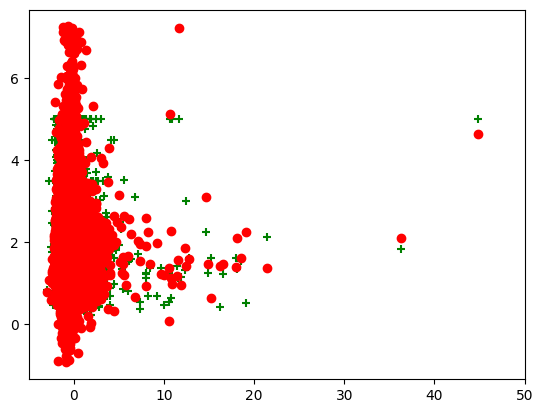

In [90]:
plt.scatter(x_train1d,y_train,color='g',marker='+')
plt.scatter(x_train1d,y_pred,color='r',marker='o')
plt.xlim(-5,50)
plt.show()

## Try to use polynomial features 

In [91]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_trainpoly=poly.fit_transform(x_train)
x_testpoly=poly.transform(x_test)

## use polyfeatures with regression

In [92]:
polymodel=LinearRegression()
polymodel.fit(x_trainpoly,y_train)

LinearRegression()

In [93]:
y_predt=polymodel.predict(x_trainpoly)
print(mean_squared_error(y_train,y_predt))
print(r2_score(y_train,y_predt))

0.42072661515735554
0.6852681982344955


In [94]:
y_predts=polymodel.predict(x_testpoly)
print(mean_squared_error(y_test,y_predts))
print(r2_score(y_test,y_predts))

0.4643015238301268
0.6456819729261869


In [95]:
x_trainpoly1d=pca.fit_transform(x_trainpoly)
x_testpoly1d=pca.transform(x_testpoly)

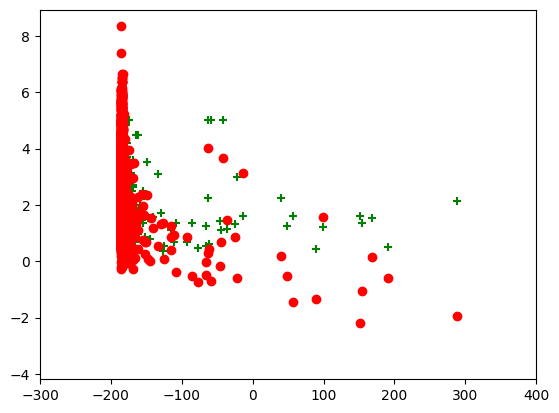

In [102]:
plt.scatter(x_trainpoly1d,y_train,color='g',marker='+')
plt.scatter(x_trainpoly1d,y_predt,color='r',marker='o')
plt.xlim(-300,400)

plt.show()